In [1]:
# sept_26_E_commerce_sample_Dataset_RFM_Segmentation

In [2]:
# import the basic library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import chardet

In [3]:
os.getcwd()

'C:\\Users\\User\\Desktop\\Sept 22 & 23 project\\E-COMMERCE PROJECT'

In [4]:
#df=pd.read_csv("e_commerce_sample.csv")

In [5]:
with open('e_commerce_sample.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
df=pd.read_csv("e_commerce_sample.csv",encoding = enc['encoding'])

In [6]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom
5,536627,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/2/2010 10:53,2.95,15658.0,United Kingdom
6,536627,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/2/2010 10:53,2.95,15658.0,United Kingdom
7,536627,21755,LOVE BUILDING BLOCK WORD,4,12/2/2010 10:53,5.95,15658.0,United Kingdom
8,536628,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/2/2010 10:54,2.55,17850.0,United Kingdom
9,536628,71053,WHITE METAL LANTERN,6,12/2/2010 10:54,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [8]:
# dropping the insignificance data
df1 = df.drop(['StockCode', 'Description','Country'],axis = 1)

In [9]:
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536627,1,12/2/2010 10:53,19.95,15658.0
1,536627,2,12/2/2010 10:53,8.50,15658.0
2,536627,3,12/2/2010 10:53,5.95,15658.0
3,536627,12,12/2/2010 10:53,1.45,15658.0
4,536627,4,12/2/2010 10:53,12.75,15658.0
...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0
75116,556023,4,6/8/2011 12:21,0.83,14527.0
75117,556023,4,6/8/2011 12:21,0.55,14527.0
75118,556023,4,6/8/2011 12:21,1.65,14527.0


In [10]:
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())

-74215
0.0


In [11]:
# These negative value in quantity , Unit price indicate the Return the shipment .
# In simple way ,the Return the shipment  we can consider there is NO SALES DONE:- No Profit No loss .
# 


def handle_neg_values(num):
    if num<0:
        return 0
    else:
        return num

In [12]:
df1["Quantity"]=[handle_neg_values(x) for x in df1.Quantity]
df1["UnitPrice"]=[handle_neg_values(x) for x in df1.UnitPrice]

In [13]:
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())

0
0.0


In [14]:
# creating a new column of Total amount
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]


In [15]:
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536627,1,12/2/2010 10:53,19.95,15658.0,19.95
1,536627,2,12/2/2010 10:53,8.50,15658.0,17.00
2,536627,3,12/2/2010 10:53,5.95,15658.0,17.85
3,536627,12,12/2/2010 10:53,1.45,15658.0,17.40
4,536627,4,12/2/2010 10:53,12.75,15658.0,51.00
...,...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0,4.95
75116,556023,4,6/8/2011 12:21,0.83,14527.0,3.32
75117,556023,4,6/8/2011 12:21,0.55,14527.0,2.20
75118,556023,4,6/8/2011 12:21,1.65,14527.0,6.60


In [16]:
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())
print(df1["Total"].min())

0
0.0
0.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   Quantity     75120 non-null  int64  
 2   InvoiceDate  75120 non-null  object 
 3   UnitPrice    75120 non-null  float64
 4   CustomerID   48212 non-null  float64
 5   Total        75120 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.4+ MB


In [18]:
# the Unit price and quantity are insignificance as we have total amount.
df2 = df1.drop(['Quantity', 'UnitPrice'],axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   InvoiceDate  75120 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        75120 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [19]:
# there are some missing value in customer id .

In [20]:
df3 = df2.dropna(axis = 0, how ='any')


In [21]:
df3


,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,12/2/2010 10:53,15658.0,19.95
1,536627,12/2/2010 10:53,15658.0,17.00
2,536627,12/2/2010 10:53,15658.0,17.85
3,536627,12/2/2010 10:53,15658.0,17.40
4,536627,12/2/2010 10:53,15658.0,51.00
...,...,...,...,...
75115,556023,6/8/2011 12:21,14527.0,4.95
75116,556023,6/8/2011 12:21,14527.0,3.32
75117,556023,6/8/2011 12:21,14527.0,2.20
75118,556023,6/8/2011 12:21,14527.0,6.60


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    48212 non-null  object 
 1   InvoiceDate  48212 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        48212 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


In [23]:
# converting invoice date to date month by importing calander
df3["InvoiceDate"]=pd.to_datetime(df3["InvoiceDate"])

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
 3   Total        48212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.8+ MB


In [25]:
df3

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
1,536627,2010-12-02 10:53:00,15658.0,17.00
2,536627,2010-12-02 10:53:00,15658.0,17.85
3,536627,2010-12-02 10:53:00,15658.0,17.40
4,536627,2010-12-02 10:53:00,15658.0,51.00
...,...,...,...,...
75115,556023,2011-06-08 12:21:00,14527.0,4.95
75116,556023,2011-06-08 12:21:00,14527.0,3.32
75117,556023,2011-06-08 12:21:00,14527.0,2.20
75118,556023,2011-06-08 12:21:00,14527.0,6.60


In [26]:
# NOW IN THE DATAFRAME THE CUSTOMER HAS PURCHASED DIFFERNT PRODUCTS , 
#WITH THE SAME CUSTOMER (SAME ID), SAME INOVICE NO. SAME TIME TOTAL HAS GIVEN
# WE HAVE TO group the rows with duplicate Invoice no.,Invoice date, cust id and adding all the total.
#by doing this no. of rows will be reduce.


In [27]:
df3_invoice=df3.groupby(["InvoiceNo"]).sum()
pd.DataFrame(df3_invoice)

,CustomerID,Total
InvoiceNo,,
536627,125264.0,217.80
536628,285600.0,230.56
536629,35700.0,22.20
536630,285600.0,244.46
536631,35700.0,22.20
...,...,...
C555889,13476.0,0.00
C555892,14227.0,0.00
C555908,15687.0,0.00


In [28]:
df3_invoice_total=df3_invoice.drop(["CustomerID"],axis=1)
df3_invoice_total

,Total
InvoiceNo,
536627,217.80
536628,230.56
536629,22.20
536630,244.46
536631,22.20
...,...
C555889,0.00
C555892,0.00
C555908,0.00


In [29]:
# 

In [30]:
df3

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
1,536627,2010-12-02 10:53:00,15658.0,17.00
2,536627,2010-12-02 10:53:00,15658.0,17.85
3,536627,2010-12-02 10:53:00,15658.0,17.40
4,536627,2010-12-02 10:53:00,15658.0,51.00
...,...,...,...,...
75115,556023,2011-06-08 12:21:00,14527.0,4.95
75116,556023,2011-06-08 12:21:00,14527.0,3.32
75117,556023,2011-06-08 12:21:00,14527.0,2.20
75118,556023,2011-06-08 12:21:00,14527.0,6.60


In [31]:
df3.tail(20)

,InvoiceNo,InvoiceDate,CustomerID,Total
75100,556023,2011-06-08 12:21:00,14527.0,8.50
75101,556023,2011-06-08 12:21:00,14527.0,8.50
75102,556023,2011-06-08 12:21:00,14527.0,6.35
75103,556023,2011-06-08 12:21:00,14527.0,9.75
75104,556023,2011-06-08 12:21:00,14527.0,1.65
75105,556023,2011-06-08 12:21:00,14527.0,6.75
75106,556023,2011-06-08 12:21:00,14527.0,17.00
75107,556023,2011-06-08 12:21:00,14527.0,9.95
75108,556023,2011-06-08 12:21:00,14527.0,8.95
75109,556023,2011-06-08 12:21:00,14527.0,8.32


In [32]:
# from th df3 , we nned to remove the rows having duplicate Invoice no. , after removing the duplicate we will have the correct no. of Rows to merge with df3_invoice_total 

In [33]:
df3_cusdid_date=df3.drop_duplicates(subset=['InvoiceNo'])

In [34]:
df3_cusdid_date

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
8,536628,2010-12-02 10:54:00,17850.0,15.30
24,536629,2010-12-02 10:55:00,17850.0,11.10
26,536630,2010-12-02 10:56:00,17850.0,15.30
42,536631,2010-12-02 10:58:00,17850.0,11.10
...,...,...,...,...
75042,556019,2011-06-08 12:02:00,18092.0,19.80
75049,556020,2011-06-08 12:03:00,13571.0,11.85
75069,556021,2011-06-08 12:03:00,12921.0,15.00
75091,556022,2011-06-08 12:04:00,12921.0,19.80


In [35]:
df3_cusdid_date=df3_cusdid_date.drop(["Total"],axis=1)

In [36]:
df3_cusdid_date

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
8,536628,2010-12-02 10:54:00,17850.0
24,536629,2010-12-02 10:55:00,17850.0
26,536630,2010-12-02 10:56:00,17850.0
42,536631,2010-12-02 10:58:00,17850.0
...,...,...,...
75042,556019,2011-06-08 12:02:00,18092.0
75049,556020,2011-06-08 12:03:00,13571.0
75069,556021,2011-06-08 12:03:00,12921.0
75091,556022,2011-06-08 12:04:00,12921.0


In [37]:
df_final=pd.merge(df3_invoice_total, df3_cusdid_date, how='left',on=['InvoiceNo'])
df_final

,InvoiceNo,Total,InvoiceDate,CustomerID
0,536627,217.80,2010-12-02 10:53:00,15658.0
1,536628,230.56,2010-12-02 10:54:00,17850.0
2,536629,22.20,2010-12-02 10:55:00,17850.0
3,536630,244.46,2010-12-02 10:56:00,17850.0
4,536631,22.20,2010-12-02 10:58:00,17850.0
...,...,...,...,...
2935,C555889,0.00,2011-06-07 16:01:00,13476.0
2936,C555892,0.00,2011-06-07 16:03:00,14227.0
2937,C555908,0.00,2011-06-07 16:08:00,15687.0
2938,C555935,0.00,2011-06-08 09:14:00,12567.0


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   Total        2940 non-null   float64       
 2   InvoiceDate  2940 non-null   datetime64[ns]
 3   CustomerID   2940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 114.8+ KB


In [39]:
# we have to decide RFM Segmentation on the basis of df_final data base
# RFM segmentation is a great method to identify groups of customers for special treatment.

In [40]:
"""
Recency: How much time has elapsed since a customer’s last  transaction
with the brand?  In most cases, the more
recently a customer has interacted or transacted with a brand, the more likely that
customer will be responsive to communications from the brand.

Frequency: How often has a customer transacted or interacted with the brand during
a particular period of time? Clearly, customers with frequent activities are more
engaged, and probably more loyal, than customers who rarely do so.

Monetary: Also referred to as “monetary value,” this factor reflects how much a
customer has spent with the brand during a particular period of time. Big spenders
should usually be treated differently than customers who spend little. 

Looking at monetary divided by frequency indicates the average purchase amount – an
important secondary factor to consider when segmenting customers.
"""

'\nRecency: How much time has elapsed since a customer’s last  transaction\nwith the brand?  In most cases, the more\nrecently a customer has interacted or transacted with a brand, the more likely that\ncustomer will be responsive to communications from the brand.\n\nFrequency: How often has a customer transacted or interacted with the brand during\na particular period of time? Clearly, customers with frequent activities are more\nengaged, and probably more loyal, than customers who rarely do so.\n\nMonetary: Also referred to as “monetary value,” this factor reflects how much a\ncustomer has spent with the brand during a particular period of time. Big spenders\nshould usually be treated differently than customers who spend little. \n\nLooking at monetary divided by frequency indicates the average purchase amount – an\nimportant secondary factor to consider when segmenting customers.\n'

In [41]:
# here we have to keep CustomerID a common indicator to find 
#(1)Latest  recent transaction by the CustomerID.:- RECENCY
#(2)No. of Frequency visit by the CustomerID.:-FREQUENCY
#(3)Total number of Monetary Purchase amount done in a duration by the CustomerID.:-MONETARY

In [42]:
max(df_final["InvoiceDate"])

Timestamp('2011-06-08 12:21:00')

In [43]:
min(df_final["InvoiceDate"])


Timestamp('2010-12-02 10:53:00')

# latest_date

In [44]:
#last date=2011-06-08 12:21:00
#latest date= 2010-12-02 10:53:00
import datetime as dt
latest_date=dt.datetime(2011,6,10)

In [45]:
# create new columns 
"""df_final["Recency"]=0
df_final["Frequency"]=0
df_final["Monetary"]=0"""

'df_final["Recency"]=0\ndf_final["Frequency"]=0\ndf_final["Monetary"]=0'

In [46]:
df_final

,InvoiceNo,Total,InvoiceDate,CustomerID
0,536627,217.80,2010-12-02 10:53:00,15658.0
1,536628,230.56,2010-12-02 10:54:00,17850.0
2,536629,22.20,2010-12-02 10:55:00,17850.0
3,536630,244.46,2010-12-02 10:56:00,17850.0
4,536631,22.20,2010-12-02 10:58:00,17850.0
...,...,...,...,...
2935,C555889,0.00,2011-06-07 16:01:00,13476.0
2936,C555892,0.00,2011-06-07 16:03:00,14227.0
2937,C555908,0.00,2011-06-07 16:08:00,15687.0
2938,C555935,0.00,2011-06-08 09:14:00,12567.0


In [47]:
RMFScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "CustomerID":lambda x:x.count(),
                                            "Total":lambda x:x.sum()})

In [48]:
RMFScore

,InvoiceDate,CustomerID,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15
...,...,...,...
18257.0,113,1,328.40
18260.0,139,3,787.77
18269.0,175,1,0.00


In [49]:
RMFScore.head(50)

,InvoiceDate,CustomerID,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15
12356.0,142,1,2271.62
12359.0,122,2,2386.41
12362.0,112,1,479.10
12370.0,174,1,277.20


In [50]:
# in the RMFSCORE
# here we have generated the Recency from InvoiceDate
# Frequency from the CustomerID
# Monetory from Total

In [51]:
# RENAME THE NAME AS PER THE RMFSCORE

In [52]:
RMFScore_final=RMFScore.rename(columns={"InvoiceDate":"Recency","CustomerID":"Frequency","Total":"Monetary"})

RMFScore_final=RMFScore_final.reset_index()

In [53]:
RMFScore_final.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
5,12356.0,142,1,2271.62
6,12359.0,122,2,2386.41
7,12362.0,112,1,479.10
8,12370.0,174,1,277.20
9,12372.0,113,1,399.22


In [54]:
# This is unsupervised ML we can predict which customer can be a potential customer 
# As per their recent visit , frequency of visit and Purchase AMOUNT history.
# for example cust id 1 just made 2 visit and purchased a large amount 154367.
# cust id 2 visited 100 time but only purchased amount of value 334 .
# cust id 1 visited 100 days before  .
# cust id 3 visted 50 days before purchased 12324
# the potential customer is id 3,1.

In [55]:
RMFScore_final.describe()

,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


In [56]:
# here it describe as below ... consider Recency , frequency and monetery .
#lower the recency GOOD recent buyer.keep percentile as 25% as GOOD BUYER. 
#recently buying is considered as good potential customer.
# Regarding frequency ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER
#Regarding Monetary ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER


In [57]:
# split the data into four segments using quantile method

In [58]:
quantiles=RMFScore_final.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()

<AxesSubplot:xlabel='Recency'>

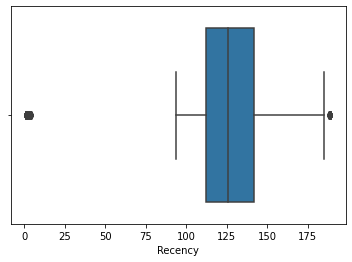

In [59]:
sns.boxplot(RMFScore_final["Recency"])

<AxesSubplot:xlabel='Frequency'>

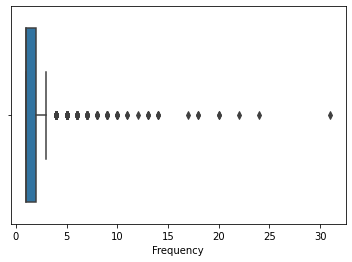

In [60]:
sns.boxplot(RMFScore_final["Frequency"])

<AxesSubplot:xlabel='Monetary'>

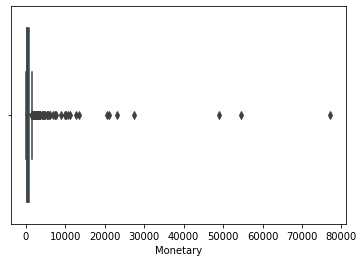

In [61]:
sns.boxplot(RMFScore_final["Monetary"])

<AxesSubplot:ylabel='Monetary'>

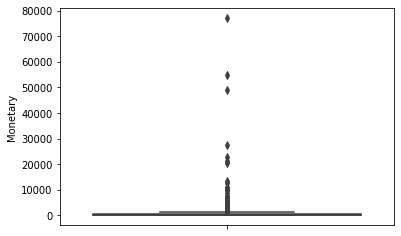

In [62]:
sns.boxplot(y="Monetary",data=RMFScore_final)

In [63]:
df_final["CustomerID"].value_counts()

14606.0    31
15311.0    24
13089.0    22
14911.0    20
17841.0    20
           ..
13659.0     1
15167.0     1
15443.0     1
14224.0     1
14227.0     1
Name: CustomerID, Length: 1428, dtype: int64

In [64]:
RMFScore_final.describe()

,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


In [65]:
# create our function to define R,F and M segment

In [66]:
def Rscoring (x,p,d):
    if x<=d[p][0.25]:# we can say lowest the recency highest the marks
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

    
def Fscoring (x,p,d):# we can say highest the frequency  highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def Mscoring (x,p,d):# we can say highest the monetary highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4    

In [67]:
RMFScore_final.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [68]:
RMFScore_final["R"]=RMFScore_final["Recency"].apply(Rscoring,args=("Recency",quantiles,))
RMFScore_final["M"]=RMFScore_final["Monetary"].apply(Mscoring,args=("Monetary",quantiles,))
RMFScore_final["F"]=RMFScore_final["Frequency"].apply(Fscoring,args=("Frequency",quantiles,))


In [69]:
RMFScore_final.head(20)

,CustomerID,Recency,Frequency,Monetary,R,M,F
0,12346.0,142,2,77183.60,2,4,3
1,12347.0,134,1,475.39,2,3,1
2,12348.0,135,2,1120.24,2,4,3
3,12350.0,127,1,334.40,2,2,1
4,12352.0,100,5,1281.15,4,4,4
5,12356.0,142,1,2271.62,2,4,1
6,12359.0,122,2,2386.41,3,4,3
7,12362.0,112,1,479.10,4,3,1
8,12370.0,174,1,277.20,1,2,1
9,12372.0,113,1,399.22,3,3,1


In [70]:
# till here we have made a performa , now we can play with management skill

In [71]:
# we can create a column which define a combind string RFM_ID to indentify the type of customer

In [72]:
RMFScore_final["RMF_ID"]=RMFScore_final.R.map(str)+RMFScore_final.M.map(str)+RMFScore_final.F.map(str)

In [73]:
RMFScore_final.head()


,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID
0,12346.0,142,2,77183.60,2,4,3,243
1,12347.0,134,1,475.39,2,3,1,231
2,12348.0,135,2,1120.24,2,4,3,243
3,12350.0,127,1,334.40,2,2,1,221
4,12352.0,100,5,1281.15,4,4,4,444


In [74]:
# we can say id 444 is the best customer

In [75]:
# or we can assign differnt marks for Recency, Frequency or monetary say 10,for monetary 8 for recency etc...

In [76]:
RMFScore_final["RMF_SUM"]=RMFScore_final[["R","M","F"]].sum(axis=1)

In [77]:
RMFScore_final.head(20)

,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM
0,12346.0,142,2,77183.60,2,4,3,243,9
1,12347.0,134,1,475.39,2,3,1,231,6
2,12348.0,135,2,1120.24,2,4,3,243,9
3,12350.0,127,1,334.40,2,2,1,221,5
4,12352.0,100,5,1281.15,4,4,4,444,12
5,12356.0,142,1,2271.62,2,4,1,241,7
6,12359.0,122,2,2386.41,3,4,3,343,10
7,12362.0,112,1,479.10,4,3,1,431,8
8,12370.0,174,1,277.20,1,2,1,121,4
9,12372.0,113,1,399.22,3,3,1,331,7


In [78]:
# we can say highest the RMF_SUM score better the customer.

In [79]:
# Assign Loyality level to each customer
Loyality_level=["Silver","Gold","Diamond","Platinum"]# creating loyality levels
score_cuts=pd.qcut(RMFScore_final.RMF_SUM,q=4,labels=Loyality_level)# qcut is a function work on quantile basis, 
#here we are applying quantile on RMS_SUM column. 
# we use q=4 means we need 4 no. of quatile , 
#q1=25% lowest RMS_SUM Value, q2,q3,q4 high , more higher value. applying labels as Loyality_level which 4 in number .
RMFScore_final["RMF_Loyality"]=score_cuts.values
RMFScore_final.head(50)

,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM,RMF_Loyality
0,12346.0,142,2,77183.60,2,4,3,243,9,Diamond
1,12347.0,134,1,475.39,2,3,1,231,6,Gold
2,12348.0,135,2,1120.24,2,4,3,243,9,Diamond
3,12350.0,127,1,334.40,2,2,1,221,5,Silver
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum
5,12356.0,142,1,2271.62,2,4,1,241,7,Gold
6,12359.0,122,2,2386.41,3,4,3,343,10,Platinum
7,12362.0,112,1,479.10,4,3,1,431,8,Diamond
8,12370.0,174,1,277.20,1,2,1,121,4,Silver
9,12372.0,113,1,399.22,3,3,1,331,7,Gold


In [80]:
# validate the data for RFM_ID = 444

In [81]:
RMFScore_final[RMFScore_final["RMF_ID"]=="444"].sort_values("Monetary",ascending=False).head(100)


,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM,RMF_Loyality
587,14646.0,108,10,54654.32,4,4,4,444,12,Platinum
1386,18102.0,2,7,48851.37,4,4,4,444,12,Platinum
449,14156.0,3,7,27449.12,4,4,4,444,12,Platinum
682,15061.0,1,18,13538.52,4,4,4,444,12,Platinum
749,15311.0,2,24,12611.05,4,4,4,444,12,Platinum
...,...,...,...,...,...,...,...,...,...,...
473,14229.0,108,4,762.13,4,4,4,444,12,Platinum
1126,17048.0,99,3,760.40,4,4,4,444,12,Platinum
411,13983.0,4,5,756.27,4,4,4,444,12,Platinum
1057,16745.0,112,3,747.77,4,4,4,444,12,Platinum


In [82]:
# for clustering purpose we only need  CustomerID	Recency	Frequency	Monetary
# other variable can only be required at the time of PRESENTATION or PPT creation.

# Creating a new dataset

In [83]:
Newdata=RMFScore_final[["CustomerID","Recency","Frequency","Monetary"]]
Newdata


,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [84]:
# HERE IS OUTLIER SO WE USE STANDARIZATION APPROACH

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaljob=StandardScaler()
scaled_data=scaljob.fit_transform(Newdata)
scaled_data

array([[-1.64897696,  0.53270017, -0.02604346, 23.72499212],
       [-1.64840727,  0.36579398, -0.46878225, -0.11003694],
       [-1.64783758,  0.38665725, -0.02604346,  0.09033299],
       ...,
       [ 1.72529952,  1.22118823, -0.46878225, -0.25775169],
       [ 1.72985705,  0.38665725, -0.46878225, -0.25775169],
       [ 1.73327519,  0.4283838 , -0.02604346, -0.19094618]])

In [87]:
# we are getting the array value we sould change it in DATAFRAME 

In [88]:
scaled_data_DF=pd.DataFrame(scaled_data,index=Newdata.index,columns=Newdata.columns)


In [89]:
scaled_data_DF

,CustomerID,Recency,Frequency,Monetary
0,-1.648977,0.532700,-0.026043,23.724992
1,-1.648407,0.365794,-0.468782,-0.110037
2,-1.647838,0.386657,-0.026043,0.090333
3,-1.646698,0.219751,-0.468782,-0.153846
4,-1.645559,-0.343557,1.302173,0.140331
...,...,...,...,...
1423,1.718463,-0.072335,-0.468782,-0.155710
1424,1.720172,0.470110,0.416695,-0.012973
1425,1.725300,1.221188,-0.468782,-0.257752
1426,1.729857,0.386657,-0.468782,-0.257752


# BUILD CLUSTERING MODEL

In [90]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    

In [91]:
km=km.fit(scaled_data_DF)
    

In [92]:
sum_of_sq_dist[k]=km.inertia_

In [93]:
 #model building is done . we can see the visualization to get the best k value by elbow method.

In [94]:
# difference between kmeans cluster and K IN KNN 
# K IN KNN IS FOR SUPERVISED AND KMEANS IS FOR UNSUPERVISED
# BOTH KNN AND KMEANS USED FOR DISTANCE METRICS



In [95]:
# visulization for getting elbow method to find the actual k value.


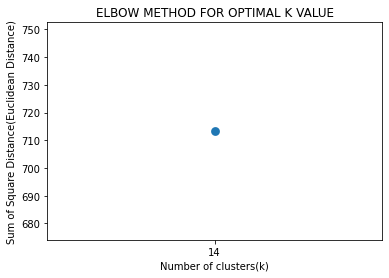

In [96]:
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

In [97]:
km=KMeans(n_clusters=14,init="k-means++",max_iter=100)

In [98]:
y_kmeans=km.fit_predict(scaled_data_DF)
y_kmeans

array([10,  3,  3, ...,  0,  6,  6])

In [99]:
RMFScore_final["CLUSTER"]=km.labels_

In [100]:
RMFScore_final

,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM,RMF_Loyality,CLUSTER
0,12346.0,142,2,77183.60,2,4,3,243,9,Diamond,10
1,12347.0,134,1,475.39,2,3,1,231,6,Gold,3
2,12348.0,135,2,1120.24,2,4,3,243,9,Diamond,3
3,12350.0,127,1,334.40,2,2,1,221,5,Silver,3
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,7
...,...,...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,3,2,1,321,6,Gold,6
1424,18260.0,139,3,787.77,2,4,4,244,10,Platinum,6
1425,18269.0,175,1,0.00,1,1,1,111,3,Silver,0
1426,18277.0,135,1,0.00,2,1,1,211,4,Silver,6


In [101]:
#RMFScore_final["Cust_ID"]=RMFScore_final.index

In [102]:
#RMFScore_final

In [103]:
#ASSIGNING THE CUSTOMER TYPE..

In [104]:
seg_map = {
    r'[1][1-2][2-3]': 'Inactive',
    r'[1-2][1-3][3]': 'at_Risk',
    r'[1-2][1-4][4]': 'cant_loose',
    r'[1][1-4][2-4]': 'about_to_sleep',
    r'[1-2][1-2][3-4]': 'need_attention',
    r'[2-4][3-4][3-4]': 'loyal_customers',
    r'[3-4][3-4][2-4]': 'promising',
    r'[1-2][1-4][1-2]': 'new_customers',
    r'[2-4][2-3][2]': 'potential_loyalists',
    r'[3-4][1-3][1-2]': 'promising',
    r'[3-4][2-4][1-2]': 'new_customers',
    r'[3-4][1-3][2-4]': 'potential_loyalists',
    r'[3-4][3-4][3-4]': 'Most Important'
    
}
RMFScore_final['segment'] = RMFScore_final['RMF_ID'].replace(seg_map, regex=True)
#RMFScore_final(inplace=True)
#RMFScore_final.reset_index(inplace=True)
RMFScore_final.head(10)

,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM,RMF_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,4,3,243,9,Diamond,10,loyal_customers
1,12347.0,134,1,475.39,2,3,1,231,6,Gold,3,new_customers
2,12348.0,135,2,1120.24,2,4,3,243,9,Diamond,3,loyal_customers
3,12350.0,127,1,334.40,2,2,1,221,5,Silver,3,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,7,loyal_customers
5,12356.0,142,1,2271.62,2,4,1,241,7,Gold,3,new_customers
6,12359.0,122,2,2386.41,3,4,3,343,10,Platinum,3,loyal_customers
7,12362.0,112,1,479.10,4,3,1,431,8,Diamond,3,promising
8,12370.0,174,1,277.20,1,2,1,121,4,Silver,8,new_customers
9,12372.0,113,1,399.22,3,3,1,331,7,Gold,3,promising


In [105]:
RMFScore_final

,CustomerID,Recency,Frequency,Monetary,R,M,F,RMF_ID,RMF_SUM,RMF_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,4,3,243,9,Diamond,10,loyal_customers
1,12347.0,134,1,475.39,2,3,1,231,6,Gold,3,new_customers
2,12348.0,135,2,1120.24,2,4,3,243,9,Diamond,3,loyal_customers
3,12350.0,127,1,334.40,2,2,1,221,5,Silver,3,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,7,loyal_customers
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,18257.0,113,1,328.40,3,2,1,321,6,Gold,6,promising
1424,18260.0,139,3,787.77,2,4,4,244,10,Platinum,6,cant_loose
1425,18269.0,175,1,0.00,1,1,1,111,3,Silver,0,new_customers
1426,18277.0,135,1,0.00,2,1,1,211,4,Silver,6,new_customers


In [106]:
print("########"*5)

########################################


In [107]:
# look at the centroid per cluster

In [108]:
"""centroid_df=RMFScore_final.groupby("CLUSTER")
centroid_df.agg({"Recency":"mean","Frequency":"mean","Monetary":"mean"}).reset_index()
[["Recency","Frequency","Monetary","Customer_ID"]].agg{"Recency":"mean","Frequency":"mean","Monetary":"mean"},"CustomerID","nunique"}.reset_index()"""

'centroid_df=RMFScore_final.groupby("CLUSTER")\ncentroid_df.agg({"Recency":"mean","Frequency":"mean","Monetary":"mean"}).reset_index()\n[["Recency","Frequency","Monetary","Customer_ID"]].agg{"Recency":"mean","Frequency":"mean","Monetary":"mean"},"CustomerID","nunique"}.reset_index()'

In [109]:
print("#######################################"*5)

###################################################################################################################################################################################################


In [110]:
print("#######################################"*5)

###################################################################################################################################################################################################


In [111]:
segments_count = RMFScore_final.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(50)

,segment,count
0,Inactive,26
1,about_to_sleep,16
2,at_Risk,82
3,cant_loose,62
4,loyal_customers,353
5,new_customers,530
6,potential_loyalists,69
7,promising,290


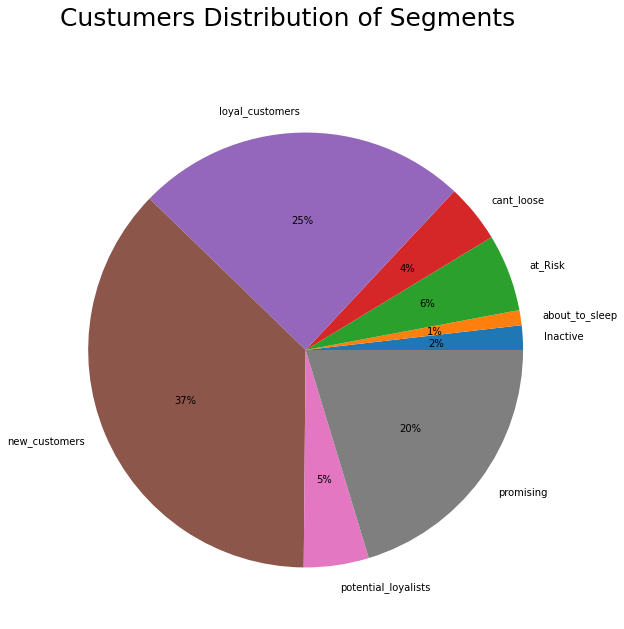

In [112]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [113]:
agg_list=["mean", "count", "max"]
RMFScore_final[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(agg_list)

Recency            Frequency               Monetary  \
                           mean count  max      mean count max         mean   
segment                                                                       
Inactive             157.923077    26  189  2.000000    26   2   200.345769   
about_to_sleep       158.812500    16  183  2.000000    16   2  2432.310625   
at_Risk              135.853659    82  170  2.000000    82   2   375.978293   
cant_loose           136.451613    62  171  3.758065    62   7  1157.762097   
loyal_customers       87.314448   353  142  4.172805   353  31  2111.077450   
new_customers        147.696226   530  189  1.000000   530   1   388.647623   
potential_loyalists   86.985507    69  126  2.405797    69   6   230.022464   
promising             86.086207   290  126  1.000000   290   1   243.980207   

                                     
                    count       max  
segment                              
Inactive               26    323.87  
about_to_sleep         16  22998.40  
at_Risk                82    699.36  
cant_loose             62   9953.96  
loyal_customers       353  77183.60  
new_customers         530   7544.91  
potential_loyalists    69    338.24  
promising             290    640.14

In [114]:
"""Apparently there are 23% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:

Give them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.
Use communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.
Ask them for feedbacks as they might know the products and services very well."""

'Apparently there are 23% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:\n\nGive them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.\nUse communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.\nAsk them for feedbacks as they might know the products and services very well.'